In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import datetime

In [37]:
#reading csv file: Tesla
tesla_file="TSLA (1).csv"
tesla_data=pd.read_csv(tesla_file)
tesla_data(20)

TypeError: 'DataFrame' object is not callable

In [3]:
#reading csv file: NIO
nio_file="NIO Historical Data (1).csv"
nio_data=pd.read_csv(nio_file)
nio_data.head(20)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 25, 2021",41.27,39.40,41.41,39.25,46.62M,6.15%
1,"Oct 22, 2021",38.88,39.96,40.39,38.54,28.02M,-2.73%
2,"Oct 21, 2021",39.97,39.51,40.60,39.37,25.19M,0.48%
3,"Oct 20, 2021",39.78,39.97,40.34,39.16,24.92M,-0.62%
4,"Oct 19, 2021",40.03,40.27,40.90,39.56,37.82M,1.06%
5,"Oct 18, 2021",39.61,37.49,39.84,37.27,43.17M,5.04%
6,"Oct 15, 2021",37.71,36.99,38.29,36.94,48.17M,3.94%
7,"Oct 14, 2021",36.28,36.21,36.45,35.60,29.71M,0.11%
8,"Oct 13, 2021",36.24,35.78,36.68,35.47,33.18M,2.06%
9,"Oct 12, 2021",35.51,35.70,36.04,35.18,26.59M,-0.36%


In [4]:
start_date=(2018,9,18)
end_date=(2021,14,10)

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
nio_data['Date'] = pd.to_datetime(nio_data['Date'])

tesla_data.set_index('Date', inplace = True)
nio_data.set_index('Date', inplace = True)

In [ ]:
#Merging the dataframes


In [5]:
#Data Cleaning: Converting Volume into float

nio_data.rename(columns={"Vol.":"Volume"},inplace=True)

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

nio_data['Volume'] = nio_data['Volume'].apply(value_to_float)
nio_data


,Price,Open,High,Low,Volume,Change %
Date,,,,,,
2021-10-25,41.27,39.40,41.41,39.25,46620000.0,6.15%
2021-10-22,38.88,39.96,40.39,38.54,28020000.0,-2.73%
2021-10-21,39.97,39.51,40.60,39.37,25190000.0,0.48%
2021-10-20,39.78,39.97,40.34,39.16,24920000.0,-0.62%
2021-10-19,40.03,40.27,40.90,39.56,37820000.0,1.06%
...,...,...,...,...,...,...
2018-09-19,8.50,7.88,9.15,7.54,48310000.0,10.68%
2018-09-18,7.68,8.73,9.10,7.67,41830000.0,-9.65%
2018-09-17,8.50,9.61,9.75,8.50,56320000.0,-14.14%


In [20]:
#Creating close price column
nio_data["Change %"]

Date
2021-10-25      6.15%
2021-10-22     -2.73%
2021-10-21      0.48%
2021-10-20     -0.62%
2021-10-19      1.06%
               ...   
2018-09-19     10.68%
2018-09-18     -9.65%
2018-09-17    -14.14%
2018-09-14    -14.66%
2018-09-13     75.76%
Name: Change %, Length: 785, dtype: object

In [21]:
#Calculating and creating percent change column for Tesla
tesla_data["Change %"]=(tesla_data["Close"]-tesla_data["Open"])/tesla_data["Open"] *100
tesla_data

,Open,High,Low,Close,Adj Close,Volume,Change %
Date,,,,,,,
2010-01-07,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,-12.160000
2010-02-07,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,-16.521739
2010-06-07,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,-19.450000
2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500,-3.658537
2010-08-07,3.228000,3.504000,3.114000,3.492000,3.492000,38557000,8.178439
...,...,...,...,...,...,...,...
2021-08-10,796.210022,796.380005,780.909973,785.489990,785.489990,16711100,-1.346382
2021-11-10,787.650024,801.239990,785.500000,791.940002,791.940002,14200300,0.544655
2021-12-10,800.929993,812.320007,796.570007,805.719971,805.719971,22020000,0.598052


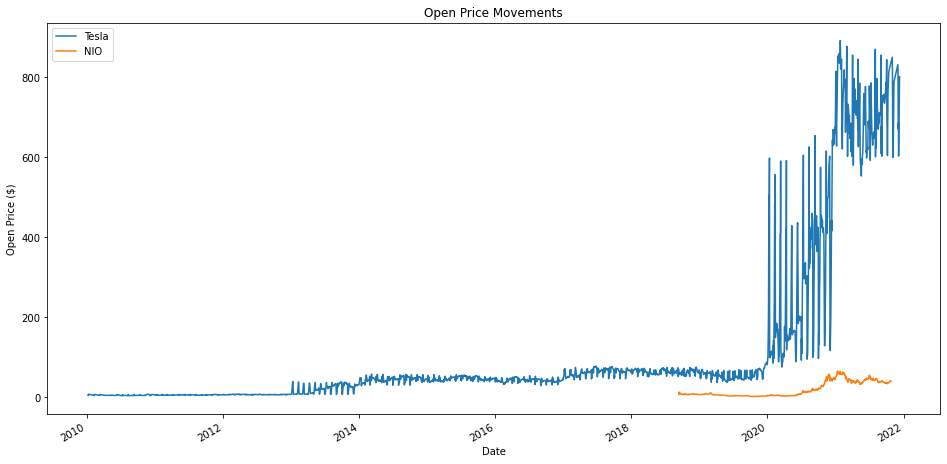

In [22]:
#Plotting based on Open price for both
tesla_data["Open"].plot(label="Tesla",figsize=(16,8),title="Open Price Movements")
nio_data["Open"].plot(label="NIO")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price ($)")

plt.show()

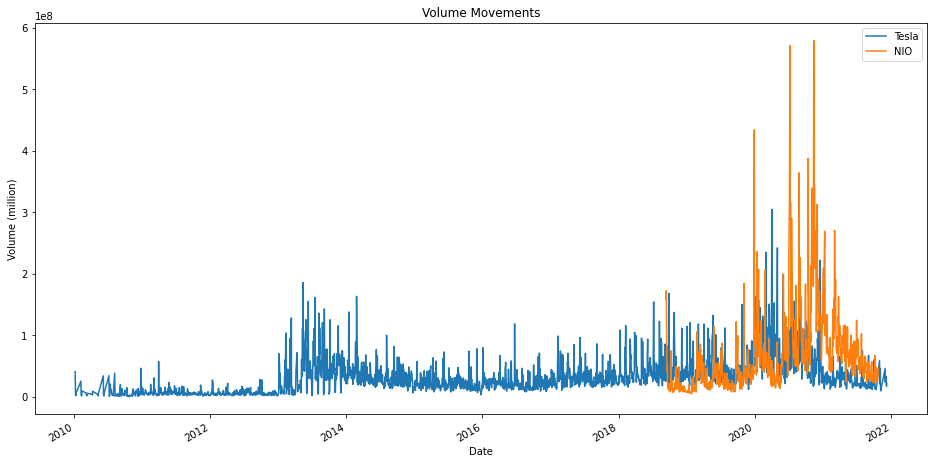

In [17]:
#Plotting based on Volume
tesla_data["Volume"].plot(label="Tesla",figsize=(16,8),title="Volume Movements")
nio_data["Volume"].plot(label="NIO")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Volume (million)")

plt.show()

In [23]:
#Determine hgihest volume trade 
telsa_vol=tesla_data["Volume"].idxmax()
nio_vol=nio_data["Volume"].idxmax()

print(f"Highest volume traded for Tesla on date: {telsa_vol}")
print(f"Highest volume traded for NIO on date: {nio_vol}")

Highest volume traded for Tesla on date: 2020-04-02 00:00:00
Highest volume traded for NIO on date: 2020-11-13 00:00:00


In [29]:
#Determine a rough estimate of the market cap.
tesla_data["Total Traded"]=tesla_data["Open"] * tesla_data["Volume"]
tesla_data

,Open,High,Low,Close,Adj Close,Volume,Change %,Total Traded
Date,,,,,,,,
2010-01-07,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,-12.160000,2.054700e+08
2010-02-07,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,-16.521739,1.182154e+08
2010-06-07,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,-19.450000,1.373380e+08
2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500,-3.658537,1.135159e+08
2010-08-07,3.228000,3.504000,3.114000,3.492000,3.492000,38557000,8.178439,1.244620e+08
...,...,...,...,...,...,...,...,...
2021-08-10,796.210022,796.380005,780.909973,785.489990,785.489990,16711100,-1.346382,1.330555e+10
2021-11-10,787.650024,801.239990,785.500000,791.940002,791.940002,14200300,0.544655,1.118487e+10
2021-12-10,800.929993,812.320007,796.570007,805.719971,805.719971,22020000,0.598052,1.763648e+10


In [31]:
#Rough estimate of market cap
nio_data["Total Traded"]=nio_data["Open"] * nio_data["Volume"]
nio_data

,Price,Open,High,Low,Volume,Change %,Total Traded
Date,,,,,,,
2021-10-25,41.27,39.40,41.41,39.25,46620000.0,6.15%,1.836828e+09
2021-10-22,38.88,39.96,40.39,38.54,28020000.0,-2.73%,1.119679e+09
2021-10-21,39.97,39.51,40.60,39.37,25190000.0,0.48%,9.952569e+08
2021-10-20,39.78,39.97,40.34,39.16,24920000.0,-0.62%,9.960524e+08
2021-10-19,40.03,40.27,40.90,39.56,37820000.0,1.06%,1.523011e+09
...,...,...,...,...,...,...,...
2018-09-19,8.50,7.88,9.15,7.54,48310000.0,10.68%,3.806828e+08
2018-09-18,7.68,8.73,9.10,7.67,41830000.0,-9.65%,3.651759e+08
2018-09-17,8.50,9.61,9.75,8.50,56320000.0,-14.14%,5.412352e+08


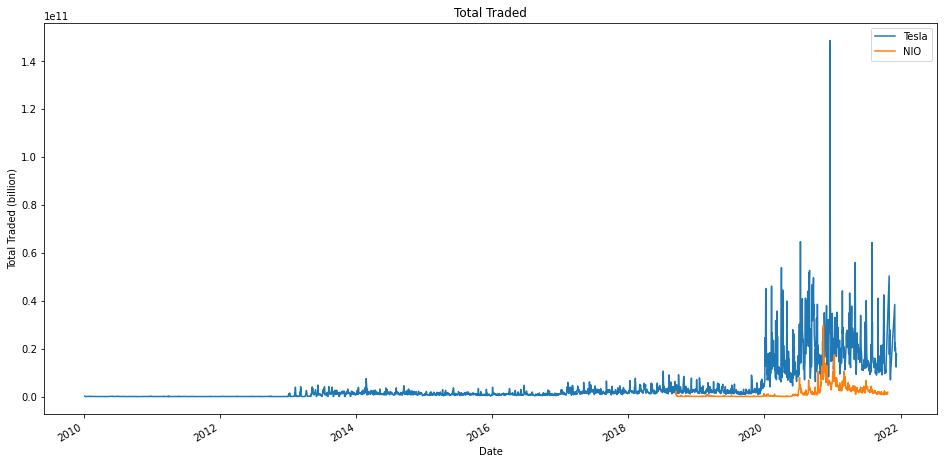

In [36]:
#Plotting Total traded against time index
tesla_data["Total Traded"].plot(label="Tesla",figsize=(16,8),title="Total Traded")
nio_data["Total Traded"].plot(label="NIO")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Total Traded (billion)")

plt.show()

In [33]:
tesla_data["Total Traded"].idxmax()

Timestamp('2020-12-18 00:00:00')